In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

In [7]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
# Step 2: Data Preprocessing
# Select relevant numerical features for clustering
# We need to identify the numerical columns, so let's check the column names
print("\nDataset Columns:")
print(df.columns)


Dataset Columns:
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [9]:
# For simplicity, we'll choose columns like `SALES`, `QUANTITYORDERED`, and `PRICEEACH` for clustering
selected_columns = ['SALES', 'QUANTITYORDERED', 'PRICEEACH']
df = df[selected_columns].dropna()  # Dropping any rows with missing values in selected columns

In [10]:
# Standardize the selected features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [12]:
# Step 3: Determine the optimal number of clusters using the Elbow Method
# The elbow point in the curve suggests the best value for K (number of clusters). 
# It's where the inertia stops decreasing significantly, indicating the ideal cluster number.

inertia = []  # Inertia values for each k
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

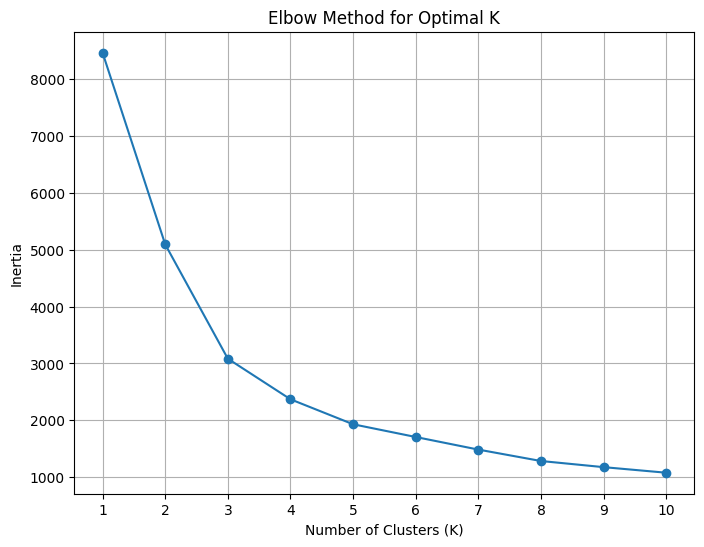

In [13]:
# Plotting the elbow curve to determine the optimal k
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

In [14]:
# Step 4: Apply K-Means clustering with the chosen number of clusters
# Based on the elbow method, assume we decide on 4 clusters for simplicity
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

print("Clustering complete! Cluster labels have been added to the DataFrame.")

Clustering complete! Cluster labels have been added to the DataFrame.


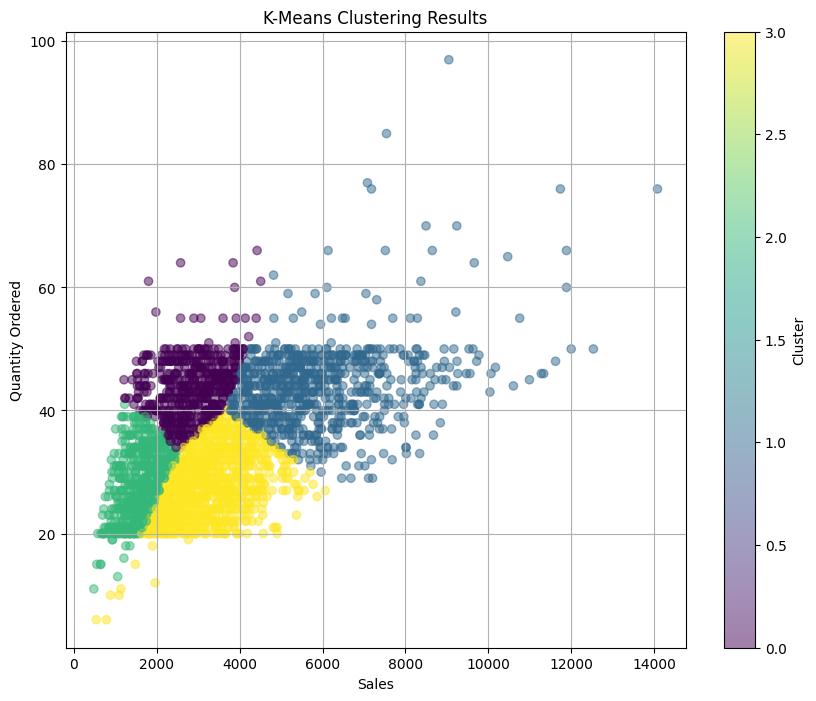

In [15]:
# Step 5: Visualizing the clusters
# Plotting clusters for `SALES` vs. `QUANTITYORDERED`
plt.figure(figsize=(10, 8))
plt.scatter(df['SALES'], df['QUANTITYORDERED'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.title('K-Means Clustering Results')
plt.xlabel('Sales')
plt.ylabel('Quantity Ordered')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()
